### This notebook calculates parameters for ALMA input and interpret result from ALMA output
This notebook has to be run with Python 3.8.10 kernel

In [3]:
# Anyways I can do some caluclations of parameters first or set up a basic script

# Required Resolution
# prob about 0.1 arcsec and maybe smaller
#To calculate

In [4]:
# import casatasks
#https://github.com/aardk/jupyter-casa/blob/master/examples/vla-cont-tutorial.ipynb
#https://colab.research.google.com/github/casangi/examples/blob/master/community/casa6_demo.ipynb#scrollTo=IIr5sp0VgR2m

### There is a sensitivity calculator already

https://almascience.nrao.edu/proposing/sensitivity-calculator


Common Parameters:


Declination:  14h08m10s

Polarisation:  Dual



### Frequency to Wavelength Conversion
| Band | 1 | 3  | 4  | 5  | 6  | 7  | 8  | 9  | 10  |
|----------------|-----|------|------|------|------|------|------|------|------|
| Frequency (GHz) | 40  | 100  | 150  | 185  | 230  | 345  | 460  | 650  | 870  |
| Wavelength (μm) | 7494.81 | 2997.92 | 1998.62 | 1620.50 | 1304.45 | 868.96 | 651.72 | 461.22 | 344.59 |

### Spatial Resolution Formula in Arcseconds

The resolution in arcseconds can be approximated as:

$$
\text{FWHM} (") = \frac{76}{\text{max\_baseline (km)} \times \text{frequency (GHz)}}
$$


### Maximum Recoverable Scale (MRS):

$$
\text{MRS} \approx 0.6 \times \frac{\lambda}{b_{\text{min}}}
$$


<p style="color:blue;">This is a note for the maximum baseline.</p>

In [5]:
# Take the radius of a CPD as 1 au (roughly for a HD168142b by calculating Hll's radius))
# Rmb AU is not parsec-dependent, just stands for Earth-Sun distance

import numpy as np
import pandas as pd
from astropy import units as u
from astropy.constants import au, pc
from tabulate import tabulate

# Convert constants to CGS values
au = au.cgs.value  # Astronomical Unit in cm
pc = pc.cgs.value  # Parsec in cm

# Define the radius of the CPD and the distance to the object
radius_cpd = 1 * au  # 1 AU in cm
distance_to_cpd = 100 * pc  # 100 parsecs in cm

# Calculate the angular size in radians (small-angle approximation)
angular_size_rad = radius_cpd / distance_to_cpd  # θ ≈ r / d for small angles

# Convert radians to arcseconds
angular_size_arcsec = (angular_size_rad * u.rad).to(u.arcsec)

print(f"The angular size of the CPD is {angular_size_arcsec:.3f}, or {angular_size_arcsec.to(u.mas):.3f} in mas.")

# Function to create ALMA table with configurations
def create_alma_table():
    """Create a Pandas DataFrame for ALMA configurations C-7 to C-10 with band row"""
    
    # Define columns
    columns = ["Config", "b_max (km)", "40 GHz", "100 GHz", "150 GHz", "185 GHz", 
               "230 GHz", "345 GHz", "460 GHz", "650 GHz", "870 GHz"]
    
    # Data excluding the "Band" row for consistency
    data = [
        ["C-7", 3.6, 0.53, 0.21, 0.14, 0.11, 0.092, 0.061, 0.046, 0.033, 0.024],
        ["C-8", 8.5, 0.24, 0.096, 0.064, 0.052, 0.042, 0.028, 0.021, 0.015, 0.011],
        ["C-9", 13.9, 0.14, 0.057, 0.038, 0.031, 0.025, 0.017, 0.012, 0.0088, 0.0066],
        ["C-10", 16.2, 0.11, 0.042, 0.028, 0.023, 0.018, 0.012, 0.0091, 0.0065, 0.0048]
    ]
    
    # Convert to DataFrame
    df = pd.DataFrame(data, columns=columns)
    
    return df

# Create the ALMA table
df = create_alma_table()

# Store angular resolution values in a universal NumPy array
angular_resolutions = df.iloc[:, 2:].to_numpy()  # Extract only frequency-dependent columns


# Extract individual arrays
C7_res = angular_resolutions[0]  # C-7 values
C8_res = angular_resolutions[1]  # C-8 values
C9_res = angular_resolutions[2]  # C-9 values
C10_res = angular_resolutions[3]  # C-10 values


# Print the DataFrame using tabulate for better formatting
print(tabulate(df, headers='keys', tablefmt='plain'))

#print(tabulate(df, headers='keys', tablefmt='latex'))

# Observational frequency and ALMA Band reference
obs_frequency = 300 * u.GHz  # Observing at 1000 nm
print(f'\nBand2 not available for cycle 11?')
print(f'\nIf I observe at 1000 nm, the frequency is {obs_frequency} (Band 7)')
print(f'Ignoring the maximum recoverable scale as no extended emission observation is being performed.')






The angular size of the CPD is 0.010 arcsec, or 10.000 mas in mas.
    Config      b_max (km)    40 GHz    100 GHz    150 GHz    185 GHz    230 GHz    345 GHz    460 GHz    650 GHz    870 GHz
 0  C-7                3.6      0.53      0.21       0.14       0.11       0.092      0.061     0.046      0.033      0.024
 1  C-8                8.5      0.24      0.096      0.064      0.052      0.042      0.028     0.021      0.015      0.011
 2  C-9               13.9      0.14      0.057      0.038      0.031      0.025      0.017     0.012      0.0088     0.0066
 3  C-10              16.2      0.11      0.042      0.028      0.023      0.018      0.012     0.0091     0.0065     0.0048

Band2 not available for cycle 11?

If I observe at 1000 nm, the frequency is 300.0 GHz (Band 7)
Ignoring the maximum recoverable scale as no extended emission observation is being performed.


In [6]:
# In terms of au
# 1 parsec = 1 AU / 1 arc second
# xau = arcsecond *100

df_times_100 = df.copy()
df_times_100.iloc[:, 2:] = df_times_100.iloc[:, 2:] * 100

# Print the new DataFrame with multiplied values using tabulate for better formatting
print("\nALMA Table with Telescopic Resolutions in AU at 100 pc from Observer:")
print(tabulate(df_times_100, headers='keys', tablefmt='plain'))


ALMA Table with Telescopic Resolutions in AU at 100 pc from Observer:
    Config      b_max (km)    40 GHz    100 GHz    150 GHz    185 GHz    230 GHz    345 GHz    460 GHz    650 GHz    870 GHz
 0  C-7                3.6        53       21         14         11          9.2        6.1       4.6        3.3        2.4
 1  C-8                8.5        24        9.6        6.4        5.2        4.2        2.8       2.1        1.5        1.1
 2  C-9               13.9        14        5.7        3.8        3.1        2.5        1.7       1.2        0.88       0.66
 3  C-10              16.2        11        4.2        2.8        2.3        1.8        1.2       0.91       0.65       0.48


### Noise Level in an Interferometer

The noise level in the resulting data cubes (expressed in mJy) for an interferometer scales as:

$$
\sigma = \frac{k T_{\text{sys}}}{A N^2 \sqrt{N_p \Delta\nu \Delta t}}
$$

where:


$$
\begin{aligned}
\sigma &= \text{Noise level (mJy)} \\
k &= \text{Boltzmann’s constant} \\
T_{\text{sys}} &= \text{System temperature} \\
A &= \text{Area of each antenna} \\
N &= \text{Number of antennas} \\
N_p &= \text{Number of polarizations} \\
\Delta\nu &= \text{Available bandwidth} \\
\Delta t &= \text{Observing time}
\end{aligned}
$$


$$ S_{\text{Jy/beam}} =  S_{\text{Jy/pixel}} \times \frac{\Omega_{\text{beam}}}{\Omega_{\text{pixel}}} $$


### Surface Brightness Sensitivity Formula

The surface brightness sensitivity for non-point source is related to the point-source sensitivity  by:

$$ \sigma_T = \frac{\sigma_S \lambda^2}{2k \Omega} $$

where the beam solid angle is given by:

$$ \Omega = \frac{\pi \theta_{res}^2}{4 \ln 2} $$

where theta is the spatial resolution (FWHM of the beam).



In [7]:
# I want to estimate the noise I need to detect the CPD with a 5 sigma confidence
# Then I can use the ALMA Sensitivity Calculator to estimate the integration time

# Radmc3d(Jy/pixel) to (ALMA)Jy/beam and integrate over the beam and divide the total flux by 5
# The beam is just the angular resolution of the band
# RADMC3d  pixel size is 0.1 arcsec
#  pixel size in arcsec = ( pixel size in cm / 1.496e13) / (distance in parsec)
# pixel size in cm can be found in image.out (4th row)

#######################################################################################################################################################################
# Relevant Pixel/Beam/Arcsecond conversion



import radmc3dPy.image as image

# Read the image.out file
img = image.readImage('image.out')

# Get the pixel size
nx = img.nx
ny = img.ny
pixel_size_x_cm = img.sizepix_x  #cm
pixel_size_y_cm = img.sizepix_y #cm

dpc = 100 #distance_to_object_pc

# Print the pixel size
print(f"The image size is {nx} pixels wide and {ny} pixels high.")
print(f"The pixel size is {pixel_size_x_cm} cm in x-direction and {pixel_size_y_cm} cm in y-direction.")


# Convert the pixel size to arcseconds
pixel_size_x_arcsec = ((pixel_size_x_cm / 1.496e13)/ dpc)  #arcsecond
pixel_size_y_arcsec = ((pixel_size_y_cm  / 1.496e13)/ dpc) #arcsecond

print(f"The pixel size is {pixel_size_x_arcsec:0.3f} arcseconds in x-direction and {pixel_size_y_arcsec:0.3f} arcseconds in y-direction.")

# Calculate the beam

beam_radmc = pixel_size_x_arcsec*pixel_size_y_arcsec # radmc3d beam in arcsec^2 
# or just the square area???

# Each band+config has a different beam size
# Need a matrix, how do I represent them so they are convenient when I need a noise level and not make it too messy?
# Start with just 1 configuration -C-10 


beam_ALMA_C10 = np.pi*(C10_res**2)/(4*np.log(2)) # for each band in C10 configuration


bands = [1, 3, 4, 5, 6, 7, 8, 9, 10]  # Correct band numbers


pixels_per_beam = [beam / beam_radmc for beam in beam_ALMA_C10]

# Print the beams in the desired format
print('\n')
print(f"The beam for radmc3d is {beam_radmc:.3e} arcsec^2")
print('\n')
print("For C10 configuration:")
print("Band\tBeam (arcsec^2)\tPixels per Beam")
for band, beam, pixels in zip(bands, beam_ALMA_C10, pixels_per_beam):
    print(f"Band {band}\t\t{beam:.3e}\t\t{pixels:.3f}")

print('\n')

print('For larger Bands, the pixel size is larger than the beam size')

Fast (Fortran90) Mie-scattering module could not be imported. Falling back to the slower Python version.
Reading image.out
The image size is 100 pixels wide and 100 pixels high.
The pixel size is 29620382642004.49 cm in x-direction and 29620382642004.49 cm in y-direction.
The pixel size is 0.020 arcseconds in x-direction and 0.020 arcseconds in y-direction.


The beam for radmc3d is 3.920e-04 arcsec^2


For C10 configuration:
Band	Beam (arcsec^2)	Pixels per Beam
Band 1		1.371e-02		34.973
Band 3		1.999e-03		5.099
Band 4		8.883e-04		2.266
Band 5		5.994e-04		1.529
Band 6		3.671e-04		0.936
Band 7		1.632e-04		0.416
Band 8		9.383e-05		0.239
Band 9		4.787e-05		0.122
Band 10		2.611e-05		0.067


For larger Bands, the pixel size is larger than the beam size


In [8]:
# Get the brightness of CPD outer rim in Jy/pixel * beam_ALMA/beam_radmc

ALMA1621_Jy_pixel = 8.769799660513e-5 # mean brightness over 4 pixels Jy/pixel   

noise = (ALMA1621_Jy_pixel/5)*beam_ALMA_C10[3]/beam_radmc

print(f'The noise level required to detect the CPD with a 5 sigma confidence is {noise:.3e} Jy/beam in Band 5 in config 10')
print(f'6.68853 hours is required')

The noise level required to detect the CPD with a 5 sigma confidence is 2.682e-05 Jy/beam in Band 5 in config 10
6.68853 hours is required


In [23]:
# Compute the mean brightness of the CPD in Jy/pixel for each image
# First, open up CARTA using ./carta-4.0-x86_64.AppImage   in Ubuntu
# Check if all my images have been saved
# Paste the directory to CARTA : /mnt/c/Users/LHEM//Desktop/Van_Code_Projects/Circumplanetary_Disk/CPD_CPDphipi_ne8
# Loaded the FITS, zoom in, and use eclipse, then the calculator (statistics widget)
# Bandwidth Per Polarization: 7.5 GHz should be selected for continuum observations in Bands 1-8 and 15 GHz in Bands 9 and 10. 

#345： 2.150189791931e-3 Jy (13 pixels)
# 461: 1.244547819414e-3  (13 pixels)
# 652: 	6.264223428354e-4 (13 pixels)
# 870: 2.314354818996e-4 (
# 1304: 5.111429471491e-5
# 1621： 2.984055981869e-5
# 2000： 1.390077620402e-5
# 3000： 3.617939506958e-6 
# 7500：1.101337660728e-7

#calculate the beam sizes

beam_ALMA_C9 = np.pi*(C9_res**2)/(4*np.log(2)) 
beam_ALMA_C8 = np.pi*(C8_res**2)/(4*np.log(2)) 
beam_ALMA_C7 = np.pi*(C7_res**2)/(4*np.log(2)) 

# Organise the data into a dictionary



data = {
    "Sky coordinates":  ["14h08m10s"]*9,
    "Polarisation":  ["Dual"]*9,
    "Bandwidth per Polarization": ["2 GHz"]*9,
    "Column Density" : ["0.913mm (3rd Octile)"]*9,
    "Resolution_C10 (arcsecond)": C10_res, # for each band
    "Resolution_C9 (arcsecond)": C9_res, # for each band
    "Resolution_C8 (arcsecond)": C8_res, # for each band
    "Resolution_C7 (arcsecond)": C7_res, # for each band
    "Band": [1, 3, 4, 5, 6, 7, 8, 9, 10],
    "Wavelength (GHz)": [ 40,100,150,185,230,345,460,650,870 ],
    "Wavelength (micron)": [7494.81, 2997.92,1998.62, 1620.50,1304.45, 868.96, 651.72, 461.22, 344.59],
    "Brightness (Jy/pixel)": [1.101337660728e-7, 3.617939506958e-6, 1.390077620402e-5, 2.984055981869e-5, 5.111429471491e-5, 2.314354818996e-4, 6.264223428354e-4, 1.244547819414e-3, 2.150189791931e-3],
    "beam_ALMA_C10 (arcsec^2)": beam_ALMA_C10,
    "beam_ALMA_C9 (arcsec^2)": beam_ALMA_C9,
    "beam_ALMA_C8 (arcsec^2)": beam_ALMA_C8,
    "beam_ALMA_C7 (arcsec^2)": beam_ALMA_C7,
}

# What else do I need in the dictionary? 
# beam of all bands in the few configurations


# Calculate the noise level
noise_C10 = [f"{(b / 5) * beam / beam_radmc:.3e}"for b, beam in zip(data["Brightness (Jy/pixel)"], data["beam_ALMA_C10 (arcsec^2)"])]
noise_C9 = [f"{(b / 5) * beam / beam_radmc:.3e}" for b, beam in zip(data["Brightness (Jy/pixel)"], data["beam_ALMA_C9 (arcsec^2)"])]
noise_C8 = [f"{(b / 5) * beam / beam_radmc:.3e}" for b, beam in zip(data["Brightness (Jy/pixel)"], data["beam_ALMA_C8 (arcsec^2)"])]
noise_C7 = [f"{(b / 5) * beam / beam_radmc:.3e}" for b, beam in zip(data["Brightness (Jy/pixel)"], data["beam_ALMA_C7 (arcsec^2)"])]

# Add the noise levels to the dictionary
data["Noise_C10 (Jy/pixel)"] = noise_C10
data["Noise_C9 (Jy/pixel)"] = noise_C9
data["Noise_C8 (Jy/pixel)"] = noise_C8
data["Noise_C7 (Jy/pixel)"] = noise_C7

In [26]:
import pandas as pd

# Create a DataFrame from the dictionary
df = pd.DataFrame(data)

# Select specific columns to include in the table
selected_columns = ["Band", "Wavelength (GHz)", "Noise_C10 (Jy/pixel)","Resolution_C10 (arcsecond)", "Noise_C9 (Jy/pixel)","Resolution_C9 (arcsecond)", "Noise_C8 (Jy/pixel)","Resolution_C8 (arcsecond)", "Noise_C7 (Jy/pixel)","Resolution_C7 (arcsecond)"]
df_selected = df[selected_columns]

# Display the selected columns of the DataFrame
print(df_selected)

   Band  Wavelength (GHz) Noise_C10 (Jy/pixel)  Resolution_C10 (arcsecond)  \
0     1                40            7.703e-07                      0.1100   
1     3               100            3.689e-06                      0.0420   
2     4               150            6.300e-06                      0.0280   
3     5               185            9.125e-06                      0.0230   
4     6               230            9.573e-06                      0.0180   
5     7               345            1.926e-05                      0.0120   
6     8               460            2.999e-05                      0.0091   
7     9               650            3.040e-05                      0.0065   
8    10               870            2.864e-05                      0.0048   

  Noise_C9 (Jy/pixel)  Resolution_C9 (arcsecond) Noise_C8 (Jy/pixel)  \
0           1.248e-06                     0.1400           3.667e-06   
1           6.795e-06                     0.0570           1.927e-05   
2  

In [27]:
# Calculate the integration time 
# Website of the ALMA Sensitivity Calculator: https://almascience.eso.org/proposing/sensitivity-calculator
# Bandwidth per polarisation is very important
# Each config evey wavelength 1 value for time
# start from the smallest frequency
# time_C10 = [3.07728 d, 4.72113 h, 1.888 h, 3.93396 d, 1.42565 h , 1.41435 h  ,  7.03288 h , 4.03182 d , 26.3272 d]
# time_C9 =[28.1364h,1.3915 h, 33.41322 min, 28.59817 h, 22.97882 min , 21.06191 min  , 2.32672 h , 28.81335 h , 7.3674 d ]
#time_C8 =[3.25894 h, 10.38128 min, 4.15125 min, 3.61402 h, 2.88571 min,  2.86069 min , 14.88085 min , 3.41166 h , 22.91217 h ]
# time_C7 = [8.22458 min, 27.19076 s, 10.87488s, 10.82963 min , 7.51944 s ,  7.6219 s , 38.78864 s , 8.74044 min , 60.67481 min]

# Convert to second and store in data

import math


def round_to_10(x):
    return int(math.ceil(x / 10.0)) * 10


# Define the function to convert time to seconds and round up to the nearest integer
def convert_to_seconds(time_list):
    converted_times = []
    for time in time_list:
        if 'd' in time:
            seconds = float(time.replace('d', '').strip()) * 86400  # Convert days to seconds
        elif 'h' in time:
            seconds = float(time.replace('h', '').strip()) * 3600  # Convert hours to seconds
        elif 'min' in time:
            seconds = float(time.replace('min', '').strip()) * 60  # Convert minutes to seconds
        elif 's' in time:
            seconds = float(time.replace('s', '').strip())  # Seconds
        else:
            raise ValueError("Unknown time format")
        converted_times.append(round_to_10(seconds))  # Round up to the nearest multiple of 10
    return converted_times

# Define the times for each configuration in different units
time_C10 = ["3.07728 d", "4.72113 h", "1.888 h", "3.93396 d", "1.42565 h", "1.41435 h", "7.03288 h", "4.03182 d", "26.3272 d"]
time_C9 = ["28.1364 h", "1.3915 h", "33.41322 min", "28.59817 h", "22.97882 min", "21.06191 min", "2.32672 h", "28.81335 h", "7.3674 d"]
time_C8 = ["3.25894 h", "10.38128 min", "4.15125 min", "3.61402 h", "2.88571 min", "2.86069 min", "14.88085 min", "3.41166 h", "22.91217 h"]
time_C7 = ["8.22458 min", "27.19076 s", "10.87488 s", "10.82963 min", "7.51944 s", "7.6219 s", "38.78864 s", "8.74044 min", "60.67481 min"]

# Convert times to seconds and round up to the nearest integer
time_C10_seconds = convert_to_seconds(time_C10)
time_C9_seconds = convert_to_seconds(time_C9)
time_C8_seconds = convert_to_seconds(time_C8)
time_C7_seconds = convert_to_seconds(time_C7)

print(time_C10_seconds)
data["Time_C10 (s)"] = time_C10_seconds
data["Time_C9 (s)"] = time_C9_seconds
data["Time_C8 (s)"] = time_C8_seconds
data["Time_C7 (s)"] = time_C7_seconds


# Create a DataFrame from the dictionary
df = pd.DataFrame(data)

# Select specific columns to include in the table
selected_columns_time = ["Band", "Wavelength (GHz)","Time_C10 (s)","Time_C9 (s)","Time_C8 (s)","Time_C7 (s)" ]
df_selected_time = df[selected_columns_time]

# Display the selected columns of the DataFrame
print(df_selected_time)


[265880, 17000, 6800, 339900, 5140, 5100, 25320, 348350, 2274680]
   Band  Wavelength (GHz)  Time_C10 (s)  Time_C9 (s)  Time_C8 (s)  Time_C7 (s)
0     1                40        265880       101300        11740          500
1     3               100         17000         5010          630           30
2     4               150          6800         2010          250           20
3     5               185        339900       102960        13020          650
4     6               230          5140         1380          180           10
5     7               345          5100         1270          180           10
6     8               460         25320         8380          900           40
7     9               650        348350       103730        12290          530
8    10               870       2274680       636550        82490         3650


In [12]:
#  Make a table of sensitivity levels for each band and configuration
# 1st column： 1 sigma in Jy/beam
# 2nd column: integration time
# 3rd column: Band
# 4th column: Configuration
# 5th column: number

In [ ]:
# Now I want to define a code that helps me  run a set of observation in casa
# need to create folders, allocate images in it.. 
#

In [13]:
import os
print(os.getcwd())


c:\Users\LHEM\Desktop\Van_Code_Projects\Circumplanetary_Disk\CPD_CPDphipi_ne8


### CASA Simobserve parameters


#### Blackbody curve

$$
B(\lambda, T) = \frac{2hc^2}{\lambda^5} \cdot \frac{1}{e^{\frac{hc}{\lambda k T}} - 1}
$$


$$
B(\nu, T) = \frac{2h\nu^3}{c^2} \cdot \frac{1}{e^{\frac{h\nu}{kT}} - 1}
$$


In [14]:
# plot the opacity file
# use pwv - 0.8 as it lies somewhere between ALMA2nd and 3rd octile, representing a realistically ideal observation
import matplotlib.pyplot as plt
from scipy.constants import h, c, k

file_path = 'C:/Users/LHEM/Desktop/Van_Code_Projects/Circumplanetary_Disk/CPD_simple_1_test__planet_refine/apex_transmission.data'
# Load the data from the file
data = np.loadtxt(file_path, comments='#', skiprows=5)

c = 2.99792458e8    # Speed of light in m/s

def planck_frequency(frequency, temperature):
    """
    Calculate the spectral radiance of a blackbody at a given temperature.
    
    Parameters:
    frequency (array-like): Frequencies in GHz.
    temperature (array-like): Temperatures in Kelvin.
    
    Returns:
    np.ndarray: Spectral radiance values.
    """
    # Convert frequency from GHz to Hz
    frequency_hz = frequency * 1e9
    
    # Initialize the list to store spectral radiance values
    BBR = []
    
    # Calculate the spectral radiance using Planck's law for each temperature
    for T in temperature:
        exponent = (h * frequency_hz) / (k * T)
        BBR0 = ((2 * h * frequency_hz**3) / (c**2)) * (1 / (np.exp(exponent) - 1))
        BBR.append(BBR0)
    
    return np.array(BBR)

# Example usage
temperatures = [20, 50, 100, 150]
frequency = data[:, 0]

print(np.shape(frequency))
print(np.shape(temperatures))
print(planck_frequency(frequency, temperatures))
print(np.shape(planck_frequency(frequency, temperatures)))

(7501,)
(4,)
[[1.91508334e-16 1.91675059e-16 1.91841831e-16 ... 1.44084400e-15
  1.44091391e-15 1.44098378e-15]
 [5.57377600e-16 5.57907485e-16 5.58437593e-16 ... 8.48796977e-15
  8.48928868e-15 8.49060760e-15]
 [1.17090676e-15 1.17204938e-15 1.17319253e-15 ... 2.18776188e-14
  2.18816610e-14 2.18857034e-14]
 [1.78506402e-15 1.78682064e-15 1.78857810e-15 ... 3.55769897e-14
  3.55838835e-14 3.55907779e-14]]
(4, 7501)


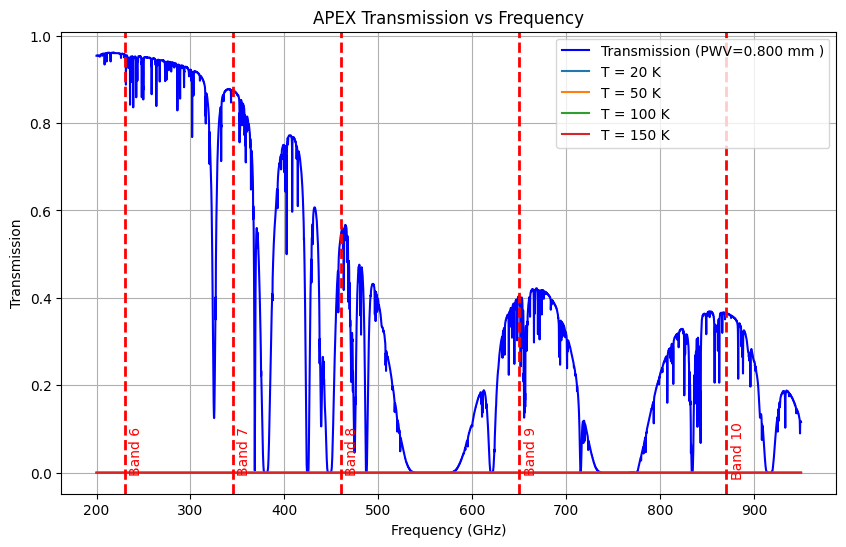

In [15]:


# Extract the first column (frequency) and the third column (transmission for PWV=0.8)
frequency = data[:, 0]
transmission = data[:, 2]


Bandfrequencies = [230, 345, 460, 650, 870]
Bandname=['Band 6', 'Band 7', 'Band 8', 'Band 9', 'Band 10']



plt.figure(figsize=(10, 6))
plt.plot(frequency, transmission, label='Transmission (PWV=0.800 mm )', color='blue')
radiance = planck_frequency(frequency, temperatures)
num_temperatures = radiance.shape[0]

for i in range(num_temperatures):
    plt.plot(frequency, radiance[i, :], label=f'T = {temperatures[i]} K')
    #plt.plot(frequency, radiance[i, :] * transmission, linestyle='--')
    
for freq, name in zip(Bandfrequencies, Bandname):
    plt.axvline(x=freq, color='red', linestyle='--', linewidth=2)
    plt.annotate(name, xy=(freq, 0.5), xytext=(freq + 5, 0.05),
                 rotation=90, verticalalignment='center', color='red')
    

plt.xlabel('Frequency (GHz)')
plt.ylabel('Transmission')
plt.title('APEX Transmission vs Frequency')
#plt.ylim(0, 3)
plt.legend()
plt.grid(True)
plt.show()

#radmc3d sed incl 0 phi 0 zoomau -2 -1 -0.5 0.5  zoom in region CPD SED
# temperature euqation just relate to T star,  planet, and accretion


# temperature range of equation
#below 1500 K (dust sublimation) for satellite formation
# from 10K to 1000K...? cuz the CPD has very steep temperature gradient depending on the distance from the planet



# Find the lambda range of each Temperature
#https://www.hamamatsu.com/us/en/resources/interactive-tools/black-body-curves.html


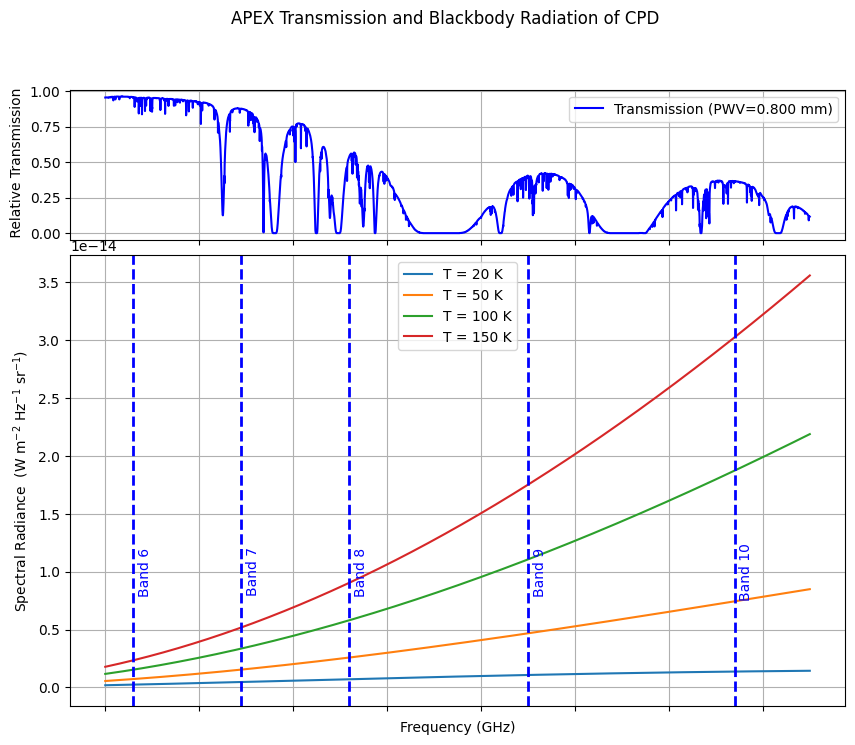

I think this demonstrates how atmospheric absorption reduces transmission at higher frequencies. 
However, for typical CPD temperatures, radiation increases at high frequencies, creating 
a competition between the two factors.


In [16]:
# Create figure and gridspec
fig = plt.figure(figsize=(10, 8))
gs = fig.add_gridspec(2, 1, height_ratios=[1, 3], hspace=0.05)

# Upper plot (transmission)
ax1 = fig.add_subplot(gs[0, 0])
ax1.plot(frequency, transmission, label='Transmission (PWV=0.800 mm)', color='blue')
ax1.set_ylabel(' Relative Transmission')
ax1.legend()
ax1.grid(True)
ax1.set_xticklabels([])  # Hide x-axis labels for the upper plot

# Lower plot (blackbody radiation curves)
ax2 = fig.add_subplot(gs[1, 0], sharex=ax1)
for i in range(num_temperatures):
    ax2.plot(frequency, radiance[i, :], label=f'T = {temperatures[i]} K')
    # ax2.plot(frequency, radiance[i, :] * transmission, linestyle='--')

for freq, name in zip(Bandfrequencies, Bandname):
    ax2.axvline(x=freq, color='blue', linestyle='--', linewidth=2)
    ax2.annotate(name, xy=(freq, 1e-14), xytext=(freq + 5, 1e-14),
                 rotation=90, verticalalignment='center', color='blue')

ax2.set_xlabel('Frequency (GHz)')
ax2.set_ylabel('Spectral Radiance  (W m$^{-2}$ Hz$^{-1}$ sr$^{-1}$)')
ax2.legend()
ax2.grid(True)

plt.suptitle('APEX Transmission and Blackbody Radiation of CPD')
plt.show()


print(f'I think this demonstrates how atmospheric absorption reduces transmission at higher frequencies. \nHowever, for typical CPD temperatures, radiation increases at high frequencies, creating \na competition between the two factors.')

In [17]:
# Use Wiens law to identify peak wavelength in GHz for each CPD characteris temperature

def wiens_law_frequency(T):
    """
    Calculates the peak frequency (GHz) of blackbody radiation using Wien's Law.

    Parameters:
        T (float): Temperature in Kelvin.

    Returns:
        float: Peak frequency in GHz.
    """
    b = 2.897e-3  # Wien's displacement constant (m·K)
    c = 3.0e8  # Speed of light (m/s)
    
    lam_max = b/T  # Peak frequency in meters
    nu_max = c / lam_max  # Convert to frequency
    nu_max_GHz = nu_max / 1e9  # Convert to GHz
    
    return nu_max_GHz

# Example usage:

print(f'For a Blackbody Radiation:')
for temp in temperatures: 
    print(f"Peak frequency for {temp} K : {wiens_law_frequency(temp):.2f} GHz")
    print('\n')


For a Blackbody Radiation:
Peak frequency for 20 K : 2071.11 GHz


Peak frequency for 50 K : 5177.77 GHz


Peak frequency for 100 K : 10355.54 GHz


Peak frequency for 150 K : 15533.31 GHz




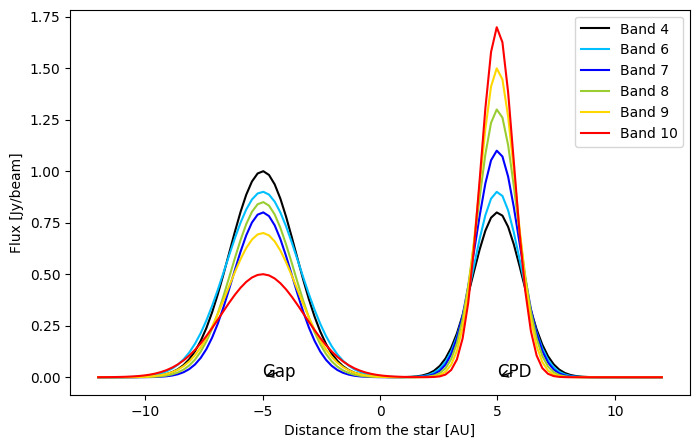

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Simulating distance data (from -12 AU to 12 AU)
distance = np.linspace(-12, 12, 100)

# Simulating flux for different bands (randomized data mimicking the trend)
flux_band4 = np.exp(-((distance+5)/2)**2) + np.exp(-((distance-5)/1.5)**2) * 0.8
flux_band6 = np.exp(-((distance+5)/2.2)**2) * 0.9 + np.exp(-((distance-5)/1.4)**2) * 0.9
flux_band7 = np.exp(-((distance+5)/1.8)**2) * 0.8 + np.exp(-((distance-5)/1.3)**2) * 1.1
flux_band8 = np.exp(-((distance+5)/1.9)**2) * 0.85 + np.exp(-((distance-5)/1.2)**2) * 1.3
flux_band9 = np.exp(-((distance+5)/2.1)**2) * 0.7 + np.exp(-((distance-5)/1.1)**2) * 1.5
flux_band10 = np.exp(-((distance+5)/2.5)**2) * 0.5 + np.exp(-((distance-5)/1.0)**2) * 1.7

# Colors matching the original plot
colors = ['black', 'deepskyblue', 'blue', 'yellowgreen', 'gold', 'red']

# Plotting
plt.figure(figsize=(8, 5))
plt.plot(distance, flux_band4, color=colors[0], label="Band 4")
plt.plot(distance, flux_band6, color=colors[1], label="Band 6")
plt.plot(distance, flux_band7, color=colors[2], label="Band 7")
plt.plot(distance, flux_band8, color=colors[3], label="Band 8")
plt.plot(distance, flux_band9, color=colors[4], label="Band 9")
plt.plot(distance, flux_band10, color=colors[5], label="Band 10")

# Labels and annotations
plt.xlabel("Distance from the star [AU]")
plt.ylabel("Flux [Jy/beam]")
plt.legend()


# Annotating Gap and CPD
plt.annotate("Gap", xy=(-5, 0.0008), xytext=(-5, 0.0011),
             arrowprops=dict(arrowstyle="->"), fontsize=12)
plt.annotate("CPD", xy=(5, 0.0015), xytext=(5, 0.0018),
             arrowprops=dict(arrowstyle="->"), fontsize=12)

# Show plot
plt.show()